In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Vérification de la fiabilité de la prédeiction

In [36]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Torax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
scores=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoint_scores').to_list())
    df.columns=parties_du_corps
    scores.append(df)

In [49]:
for i in range(len(scores)):
    minimum=scores[i].min()
    for i in range(17):
        if minimum[i]!=1:
            print(i)

On peut voir que l'ia de détection des points a toujours été sûre d'elle lors des prédictions de points. Donc toute les données sont utilisables.

# Recupération des points

In [3]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Torax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
datas=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoints').to_list())
    df.columns=parties_du_corps
    datas.append(df)
    

In [47]:
datas[0].describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Torax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
unique,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
top,"[-0.0, 0.0, 0.7593588829040521]","[0.08651806414127301, -0.10648385435342701, 0....","[0.04174243286252, -0.14217326045036302, 0.387...","[0.009176269173622001, -0.013015318661928002, ...","[-0.08041528612375201, 0.11247754096984801, 0....","[-0.11537133902311301, 0.35674405097961404, 0....","[0.05012963712215401, 0.6188527941703791, 0.19...","[0.001279785181395, -0.014751312322914002, 0.9...","[0.015425292775034, 0.07461367547512, 1.207973...","[0.030669678002595003, -0.036371625959873005, ...","[0.034225340932607005, 0.10570855438709201, 1....","[-0.11801952868700001, 0.08621537685394201, 1....","[-0.30278760194778404, 0.146564751863479, 1.09...","[-0.47729247808456404, -0.018800392746925, 1.0...","[0.14940381050109802, -0.091575898230075, 1.18...","[0.29977318644523604, -0.342856496572494, 1.12...","[0.463740736246109, -0.59499168395996, 1.10003..."
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Moyennes

In [ ]:
moyennes_x=[]
moyennes_y=[]
moyennes_z=[]
for i in range(17):
    moyennes_x_temp=[]
    moyennes_y_temp=[]
    moyennes_z_temp=[]
    for j in range(len(datas)):
        moyennes_x_temp.append(datas[j][parties_du_corps[i]].str[0].mean())
        moyennes_y_temp.append(datas[j][parties_du_corps[i]].str[1].mean())
        moyennes_z_temp.append(datas[j][parties_du_corps[i]].str[2].mean())
    moyennes_x.append(moyennes_x_temp)
    moyennes_y.append(moyennes_y_temp)
    moyennes_z.append(moyennes_z_temp)

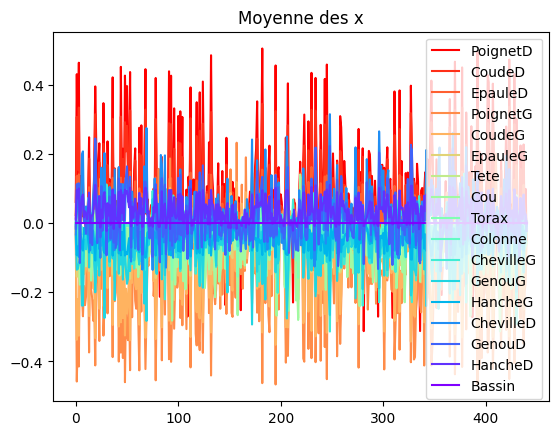

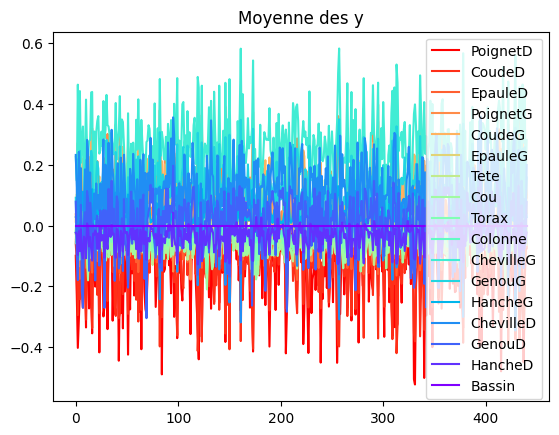

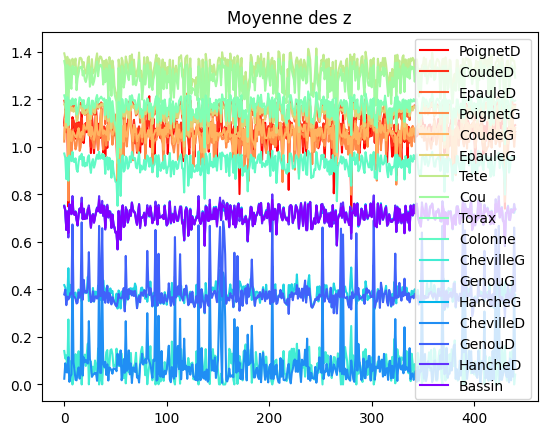

In [15]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(moyennes_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyenne des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyenne des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyenne des z")
plt.legend()
plt.show()


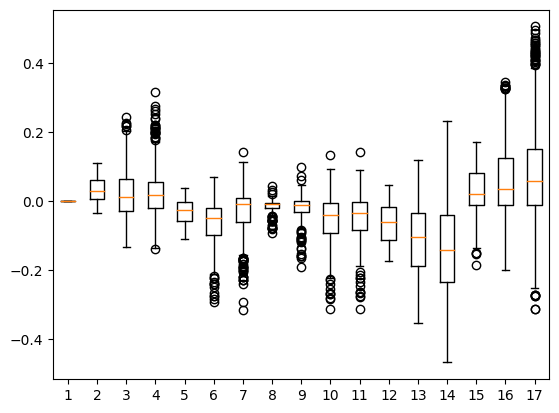

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


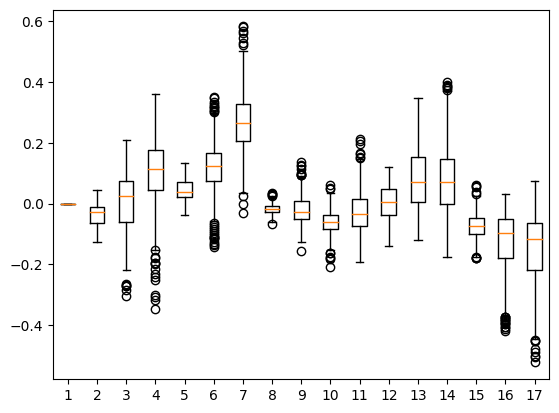

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


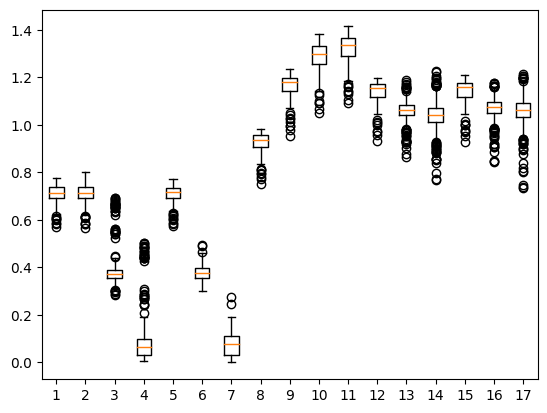

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


In [ ]:
plt.boxplot(moyennes_x)
plt.title("Moyenne des x")
plt.show()
print(parties_du_corps)
plt.title("Moyenne des y")
plt.boxplot(moyennes_y)
plt.show()
print(parties_du_corps)
plt.title("Moyenne des z")
plt.boxplot(moyennes_z)
plt.show()
print(parties_du_corps)

On peut voir que l'on a des parties qui sont plus stables que d'autres sur l'ensemble de notre data set par exemple on peut voir que les poignets varient beaucoup plus que le torax par exemple d'une video a une autre. On peut aussi voir que les hauteurs ne varie pas trop par exemple la tete reste bien en haut et les chevilles en bas.

# Ecart types

In [22]:
ecarts_types_x=[]
ecarts_types_y=[]
ecarts_types_z=[]
for i in range(17):
    ecarts_types_x_temp=[]
    ecarts_types_y_temp=[]
    ecarts_types_z_temp=[]
    for j in range(len(datas)):
        ecarts_types_x_temp.append(datas[j][parties_du_corps[i]].str[0].std())
        ecarts_types_y_temp.append(datas[j][parties_du_corps[i]].str[1].std())
        ecarts_types_z_temp.append(datas[j][parties_du_corps[i]].str[2].std())
    ecarts_types_x.append(ecarts_types_x_temp)
    ecarts_types_y.append(ecarts_types_y_temp)
    ecarts_types_z.append(ecarts_types_z_temp)

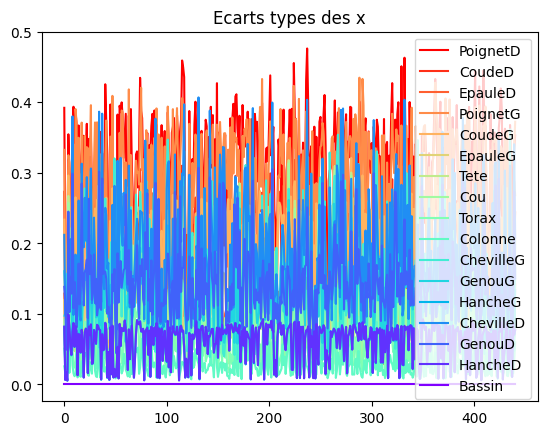

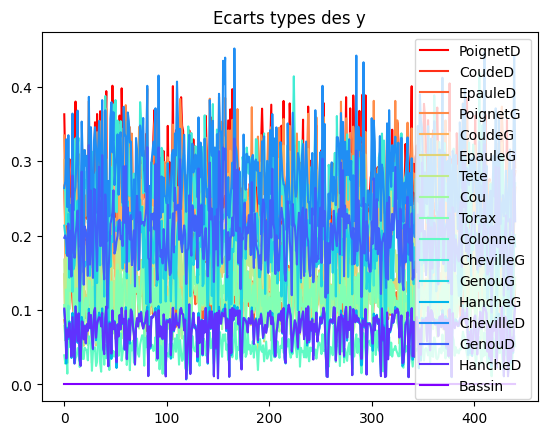

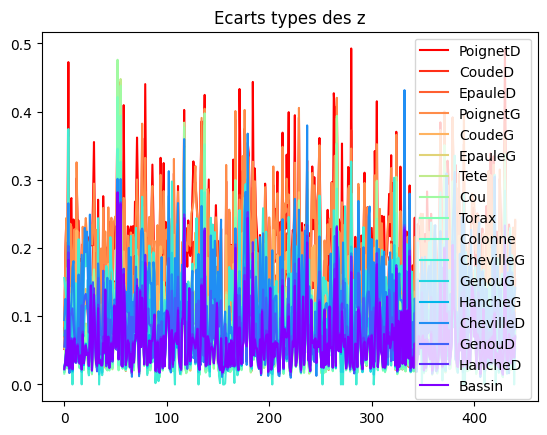

In [23]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(ecarts_types_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des z")
plt.legend()
plt.show()

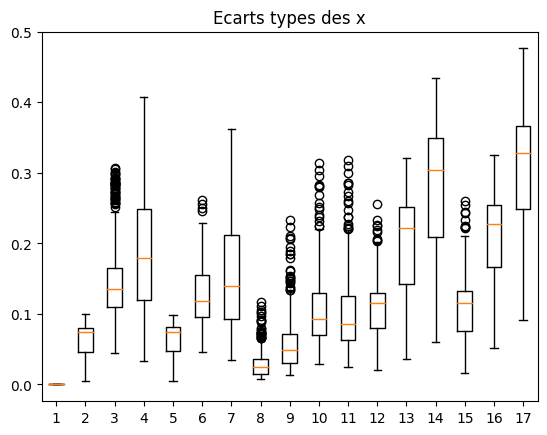

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


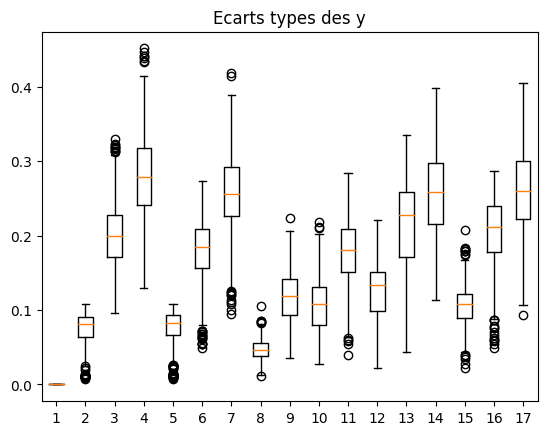

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


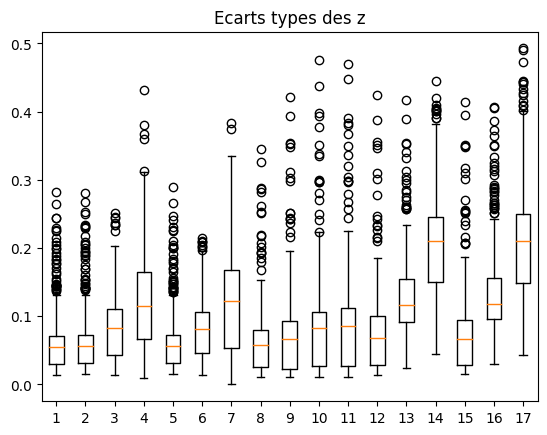

['Bassin', 'HancheD', 'GenouD', 'ChevilleD', 'HancheG', 'GenouG', 'ChevilleG', 'Colonne', 'Torax', 'Cou', 'Tete', 'EpauleG', 'CoudeG', 'PoignetG', 'EpauleD', 'CoudeD', 'PoignetD']


In [26]:
plt.boxplot(ecarts_types_x)
plt.title("Ecarts types des x")
plt.show()
print(parties_du_corps)
plt.title("Ecarts types des y")
plt.boxplot(ecarts_types_y)
plt.show()
print(parties_du_corps)
plt.title("Ecarts types des z")
plt.boxplot(ecarts_types_z)
plt.show()
print(parties_du_corps)

On voit que certaines parties du corps comme les poignets et les chevilles sont plus dispersé autour de la moyenne que d'autre comme le torax et la colonne sur les axes x et y. On peut aussi voir que les parties du corps reste un peu plus stable sur la hauteur (l'axe z) que dans les autres directions. On remarque que le bassin ne bouge pas dans les axes x et y.